# The Catering Problem

## Motivation

A catering company to cook $n$ dishes, but has only one available oven.
    At most a single dish can be inside the oven at one time.    
    Each dish $i$ has its earliest time when it can be put into the oven $r_i$ (since it needs to be prepared before it is put into the oven), the latest time it should be taken from the oven $d_i$ (since the customers do not want to wait too long), and the time it needs to stay in the oven $p_i$.
    The goal is to find the vector of times $\mathbf{s} = (s_0, \dots, s_{n-1})$ (denoting the times when each dish is put into the oven) such that the finish time of the last dish is minimal.
    
## Input

You are given the following:
* number of dished $n$
* parameters $r_i$, $d_i$ and $p_i$ for each dish $i$

For the testing purposes, you can experiment with the following instance:

In [1]:
n = 5
params = {
    0: {'r': 20, 'd': 45, 'p': 15},
    1: {'r':  4, 'd': 30, 'p': 19},
    2: {'r':  5, 'd': 80, 'p': 20},
    3: {'r': 17, 'd': 70, 'p':  8},
    4: {'r': 27, 'd': 66, 'p':  7}
}

# Note: parameter d_1 can be obtained by params[1]["d"]

## Output

You are expected to find the vector $\mathbf{s} = (s_0, \dots, s_{n-1})$ denoting the times when each dish should be put into the oven.

The optimal solution vector for the given instance is $\mathbf{s} = (23, 4, 53, 38, 46)$.

## Exercise

Your task is to formulate the ILP model of the catering problem, solve it, and extract the vector $\mathbf{s}$. The example solution follows:

Hint: to ensure that any two dishes $i$ and $j$ are not overlapping in the oven, you need to ensure that one of the following constraints holds: $s_i + p_i \leq s_j$ or $s_j + p_j \leq s_i$. This might be perhaps done using big-M... 

In [4]:
import gurobipy as grb  # import Gurobi module

# model -----------------------------------------------------
model = grb.Model()

# - ADD VARIABLES
pi = [model.addVar(lb=0, vtype=grb.GRB.INTEGER, name='put in oven{}'.format(i)) for i in range(len(params))]

# - ADD CONSTRAINTS
for i in range(len(params)):
    model.addConstr(pi[i] >= params[i]['r'])
    model.addConstr(pi[i] + params[i]['p'] <= params[i]['d'])
    for j in range(len(params)):
        if j == i:
            continue
        model.addConstr(pi[i] + params[i]['p'] <= pi[j] or pi[j] + params[j]['p'] <= pi[i])


# - SET OBJECTIVE
model.setObjective(grb.max_(pi), sense=grb.GRB.MINIMIZE)

# call the solver -------------------------------------------
model.optimize()

# print the solution ----------------------------------------
print('\nSOLUTION:')
print(model.objVal)

ModuleNotFoundError: No module named 'gurobipy'

## Solution visualization

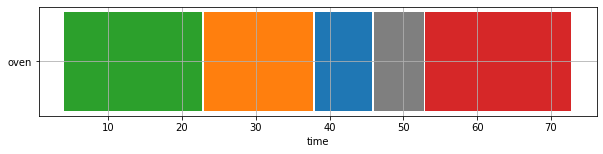

In [6]:
import matplotlib.pyplot as plt 

def plot_solution(s, p):
    """
    s: solution vector
    p: processing times
    """
    fig = plt.figure(figsize=(10,2))
    ax = plt.gca()
    ax.set_xlabel('time')     
    ax.grid(True) 
    ax.set_yticks([2.5])
    ax.set_yticklabels(["oven"]) 
    eps = 0.25  # just to show spaces between the dishes
    ax.broken_barh([(s[i], p[i]-eps) for i in range(len(s))], (0, 5), 
                   facecolors=('tab:orange', 'tab:green', 'tab:red', 'tab:blue', 'tab:gray'))

# TODO: plot your solution
plot_solution([23.0, 4.0, 53.0, 38.0, 46.0], [params[i]["p"] for i in range(n)])